In [3]:
import ctypes
import numpy as np

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL('modele/rbf_network/target/release/librbf_network.so')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_regression_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

#



Predictions with k=5, gamma=0.1, max_iter=100000: [5.33442560e-05 9.99945935e-01 9.99947462e-01 5.33439505e-05]


In [4]:

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

def generate_linear_data(n_points, noise_level=0.1):
    """Génère des données de régression linéaire simple avec du bruit."""
    np.random.seed(42)
    x = np.random.rand(n_points, 1).astype(np.float64) * 10  # Points entre 0 et 10
    y = 2 * x[:, 0] + 1 + np.random.randn(n_points).astype(np.float64) * noise_level  # y = 2x + 1 + bruit
    return x, y

def rbf_train_and_predict(x_train, y_train, x_test, k, gamma, max_iter):
    """Entraîne le modèle RBF et effectue des prédictions."""
    x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_train))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_train]
    )
    y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

    model_ptr = ctypes.POINTER(RBFModel)()
    weights_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.train_rbf_model_ffi(
        x_train_ptrs,
        y_train_ptr,
        len(x_train),
        x_train.shape[1],
        k,  # nombre de centres
        max_iter, # nombre d'itérations max
        ctypes.byref(model_ptr),
        ctypes.byref(weights_ptr)
    )
    assert model_ptr is not None
    assert weights_ptr is not None

    x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(x_test))(
        *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in x_test]
    )

    pred_ptr = ctypes.POINTER(ctypes.c_double)()
    lib.rbf_regression_ffi(
        x_test_ptrs,
        len(x_test),
        x_test.shape[1],
        model_ptr,
        gamma,  # gamma
        weights_ptr,
        ctypes.byref(pred_ptr)
    )
    assert pred_ptr is not None

    predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(x_test),))

    lib.free_predictions(pred_ptr)
    lib.free_rbf_model(model_ptr)
    ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

    return predictions

# Générer des données de régression linéaire
n_points = 100
x_train, y_train = generate_linear_data(n_points, noise_level=0.1)
x_test = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float64)

# Paramètres du modèle RBF
k = 10  # nombre de centres
gamma = 0.1  # paramètre gamma
max_iter = 100  # nombre d'itérations max

# Entraîner le modèle RBF et effectuer des prédictions
predictions = rbf_train_and_predict(x_train, y_train, x_test, k, gamma, max_iter)

# Visualiser les résultats
plt.scatter(x_train, y_train, label='Training data', color='blue')
plt.plot(x_test, predictions, label='RBF predictions's, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


OSError: C:\Users\tinhi\rbf_network\target\release\rbf_network.dll: cannot open shared object file: No such file or directory

Prédictions : [ 0.11795706 -0.19736788  1.215861  ]
Classes réelles : [ 1. -1.  1.]


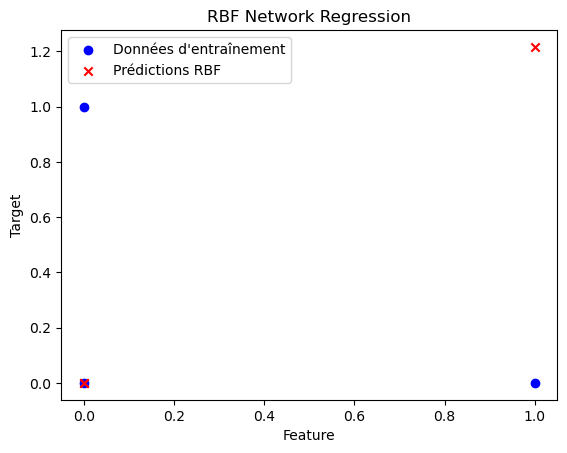

In [ ]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

# Charger la bibliothèque partagée compilée à partir du code Rust
lib = ctypes.CDLL(r'C:\Users\tinhi\RustroverProjects\rbf_classification\target\release\rbf_classification.dll')

class RBFModel(ctypes.Structure):
    _fields_ = [("centers", ctypes.POINTER(ctypes.POINTER(ctypes.c_double))),
                ("gamma", ctypes.c_double),
                ("weights", ctypes.POINTER(ctypes.c_double))]

# Définir les types de retour et les arguments des fonctions
lib.train_rbf_model_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double,
    ctypes.POINTER(ctypes.POINTER(RBFModel)),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.rbf_regression_ffi.argtypes = [
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double)),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.POINTER(RBFModel),
    ctypes.c_double,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.POINTER(ctypes.c_double))
]

lib.free_rbf_model.argtypes = [ctypes.POINTER(RBFModel)]
lib.free_predictions.argtypes = [ctypes.POINTER(ctypes.c_double)]

# Données d'entraînement
X_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0]
], dtype=np.float64)

y_train = np.array([
    [1.0],
    [-1.0],
    [1.0]
], dtype=np.float64)

# Convertir les données pour FFI
x_train_ptrs = (ctypes.POINTER(ctypes.c_double) * len(X_train))(
    *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in X_train]
)
y_train_ptr = y_train.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

# Paramètres du modèle RBF
k = 2  # nombre de centres
gamma = 1.0  # paramètre gamma
max_iter = 1000  # nombre d'itérations max

# Initialiser et entraîner le modèle RBF
model_ptr = ctypes.POINTER(RBFModel)()
weights_ptr = ctypes.POINTER(ctypes.c_double)()
lib.train_rbf_model_ffi(
    x_train_ptrs,
    y_train_ptr,
    len(X_train),
    X_train.shape[1],
    k,  # nombre de centres
    max_iter, # nombre d'itérations max
    gamma, # gamma
    ctypes.byref(model_ptr),
    ctypes.byref(weights_ptr)
)
assert model_ptr is not None
assert weights_ptr is not None

# Données de test (identiques aux données d'entraînement)
X_test = X_train
x_test_ptrs = (ctypes.POINTER(ctypes.c_double) * len(X_test))(
    *[row.ctypes.data_as(ctypes.POINTER(ctypes.c_double)) for row in X_test]
)

# Prédiction avec le modèle RBF
pred_ptr = ctypes.POINTER(ctypes.c_double)()
lib.rbf_regression_ffi(
    x_test_ptrs,
    len(X_test),
    X_test.shape[1],
    model_ptr,
    gamma,  # gamma
    weights_ptr,
    ctypes.byref(pred_ptr)
)
assert pred_ptr is not None

# Lecture et affichage des prédictions
predictions = np.ctypeslib.as_array(pred_ptr, shape=(len(X_test),))
print(f'Prédictions : {predictions}')
print(f'Classes réelles : {y_train.ravel()}')

# Libérer la mémoire associée aux prédictions et au modèle
lib.free_predictions(pred_ptr)
lib.free_rbf_model(model_ptr)
ctypes.cast(weights_ptr, ctypes.POINTER(ctypes.c_void_p))

# Visualisation des résultats
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', marker='o', label='Données d\'entraînement')
plt.scatter(X_test[:, 0], predictions, c='red', marker='x', label='Prédictions RBF')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('RBF Network Regression')
plt.legend()
plt.show()
